# Installing Needed Tools

In [14]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## Tools

In [15]:
import numpy as np # for handling numbers
import pandas as pd # for handling spreadsheet data
import matplotlib.pyplot as plt # for plotting
import cv2 # computer vision from extracting features from images
import seaborn as sns # enchancement of plotting 
import math # uses for log operations to prevent underflow when calculating very small %'s
sns.set_style("darkgrid")

## Dataset
Load the spreadsheet for feature extraction with computer vision.

In [16]:
spreadsheet_data = pd.read_csv("birds.csv") # load the dataset
spreadsheet_data.head(10)

,class id,filepaths,labels,data set,scientific name
0,40.0,train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
1,40.0,train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
2,40.0,train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
3,40.0,train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
4,40.0,train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
5,40.0,train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
6,40.0,train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
7,40.0,train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
8,40.0,train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS
9,40.0,train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,train,MEROPS ORIENTALIS


# Computer Vision & Features
The spreadsheet does not directly contains the features, rather the filepaths for the images. Before we can use Naive Bayes we need to use convert these images to usable data format in python.

In [17]:

# Get a reduced size image's array of the pixel data into a dataframe to easily relate it to it's 'label'
def load_resize_flatten_images(df, target_size=(28, 28)):    
    # convert data format to feature vectors
    data = {'image':[],'label':[], 'class':[], 'class no':[]}
    for _, row in df.iterrows():
       
        # extractp pixel data from the image at the file path
        image = cv2.imread(row['filepaths'])
        # gray scale to reduce data size while retaining most data as colors well be stored as intenisity
        grayscaledImage = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        # resize image to smaller dimensions make data more managable
        resizedImage = cv2.resize(grayscaledImage,target_size)
        resizedImage = resizedImage / 255
        # flatten into a 1D array
        imageArray = resizedImage.flatten()
        data['image'].append(imageArray)
        # use the filepath as an identifer to label the image data
        data['label'].append(row['filepaths'])
        # inded class from 0 to len(class) for confusion matrix and f1score methods from skitlearn later.
        match row['labels']:
            case 'ASIAN GREEN BEE EATER':
                data['class no'].append(0)
            case 'D-ARNAUDS BARBET':
                data['class no'].append(1)
            case 'HOUSE FINCH':
                data['class no'].append(2)
            case 'OVENBIRD':
                data['class no'].append(3)
            case 'RUFOUS TREPE':
                data['class no'].append(4)
                
        data['class'].append(row['labels'])
    # encapsulate this data as a dataframe for easier handling
    return pd.DataFrame(data)
pixelData = load_resize_flatten_images(spreadsheet_data)
pixelData.head(10)


,image,label,class,class no
0,"[0.19607843137254902, 0.21176470588235294, 0.2...",train/ASIAN GREEN BEE EATER/162.jpg,ASIAN GREEN BEE EATER,0
1,"[0.4666666666666667, 0.4470588235294118, 0.419...",train/ASIAN GREEN BEE EATER/136.jpg,ASIAN GREEN BEE EATER,0
2,"[0.5647058823529412, 0.5647058823529412, 0.564...",train/ASIAN GREEN BEE EATER/153.jpg,ASIAN GREEN BEE EATER,0
3,"[0.615686274509804, 0.615686274509804, 0.61568...",train/ASIAN GREEN BEE EATER/102.jpg,ASIAN GREEN BEE EATER,0
4,"[0.5607843137254902, 0.5568627450980392, 0.572...",train/ASIAN GREEN BEE EATER/145.jpg,ASIAN GREEN BEE EATER,0
5,"[0.34509803921568627, 0.34901960784313724, 0.3...",train/ASIAN GREEN BEE EATER/101.jpg,ASIAN GREEN BEE EATER,0
6,"[0.2784313725490196, 0.2823529411764706, 0.356...",train/ASIAN GREEN BEE EATER/105.jpg,ASIAN GREEN BEE EATER,0
7,"[0.47058823529411764, 0.4627450980392157, 0.46...",train/ASIAN GREEN BEE EATER/166.jpg,ASIAN GREEN BEE EATER,0
8,"[0.43137254901960786, 0.3568627450980392, 0.23...",train/ASIAN GREEN BEE EATER/106.jpg,ASIAN GREEN BEE EATER,0
9,"[0.8509803921568627, 0.8627450980392157, 0.854...",train/ASIAN GREEN BEE EATER/103.jpg,ASIAN GREEN BEE EATER,0


## Basic Exploratory Data Analysis (EDA)
A given pixels value is logically independent of another. Since the heat map in the example exists to prove inpendence it has been forgone.
Here's a histogram of all pxiels in the dataset.

Text(0.5, 1.0, 'Grayscale Pixel Values')

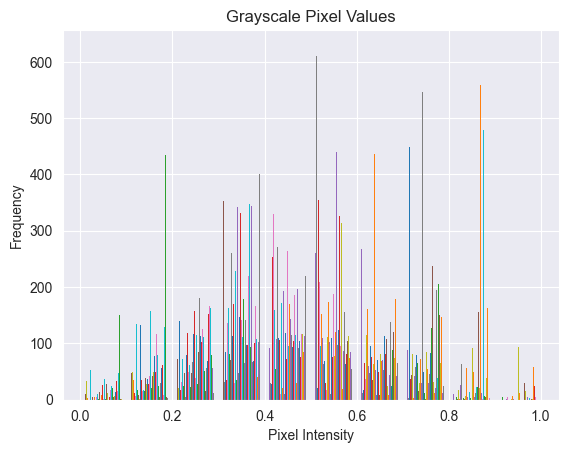

In [18]:
# Create a histogram with specified color
plt.hist(pixelData["image"], lw=0)

# Labeling x and y axes
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Title for the histogram
plt.title('Grayscale Pixel Values')

# EDA II, Data Distrubtion
Histrogram of all gray scale pixel data(like above) but broken down by class(bird species).

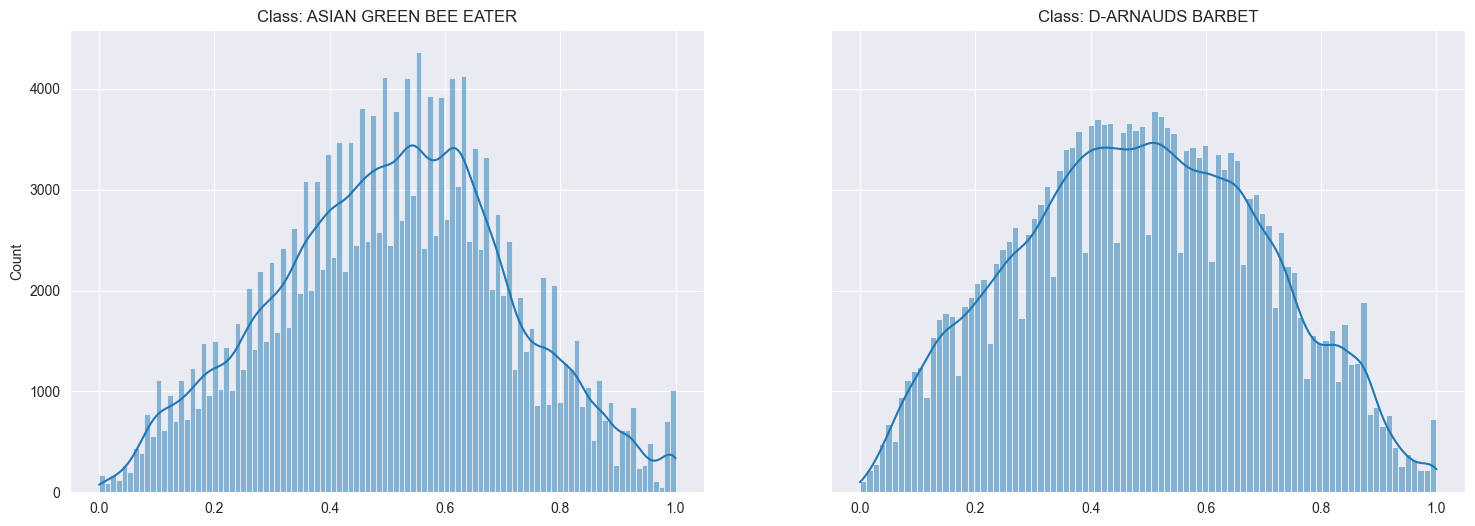

In [19]:
def EDA2(df):
    # show per label distrubtion
    classes = list(df['class'].unique())
    
    fig, axes = plt.subplots(1, len(classes), figsize=(18, 6), sharey=True)
    for i,clas in enumerate(classes):
        # get image data of the given class
        classData = df[df['class'] == clas]['image']
        # format the data for sns plotting
        flattened_data = np.concatenate(classData.values)
        # plot the data
        sns.histplot(flattened_data, ax=axes[i],  kde=True)
        axes[i].set_title(f'Class: {clas}')  # Set title for each subplot
EDA2(pixelData)


# EDA Results
It seems these are approx. normal distrubtion thus Guassian Naive Bayes is applicable.

# Logistic Regression Beyond this point

# Split Data
The pre-split data sets doesn't have sufficent test data points. So the datasets are merged into one dataframe and split in a 70/30(train/test) fashion.

In [51]:
from sklearn.model_selection import train_test_split

# tolist + np.array shaped X into (~473,784) 2D Numpy Array
X = pixelData['image'].tolist()
X = np.array(X)

Y = pixelData['class no'].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Evaluation

In [63]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

# see how accurate the model is
print(classification_report(y_test, y_pred))
print('-'*55) # prints 55 dashes
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))
print(f1_score(y_test, y_pred,average='micro'))

ValueError: shapes (316,784) and (316,784) not aligned: 784 (dim 1) != 316 (dim 0)